In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload CSV files
uploaded = files.upload()

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataframe
print(customers.head())
print(products.head())
print(transactions.head())

Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      

In [3]:
# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

## Customer Demographics

In this section, we will analyze the distribution of customers across different regions and the trends in customer signups.

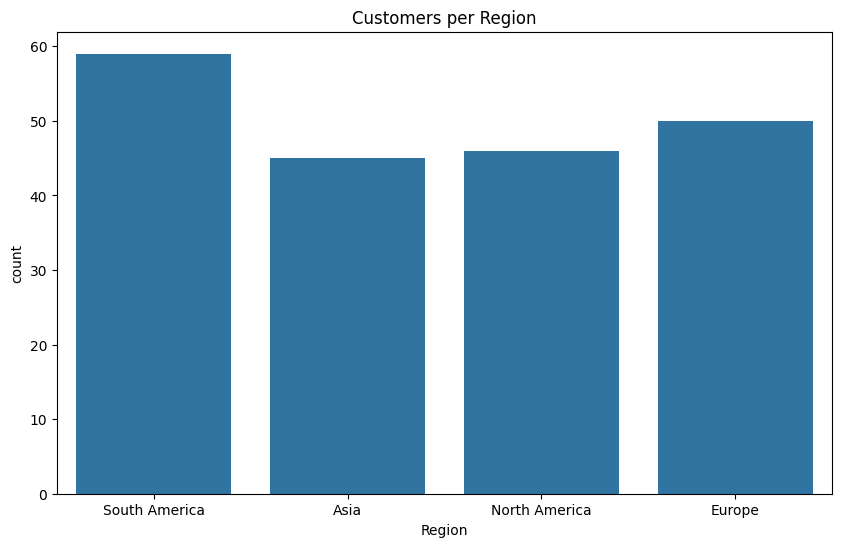

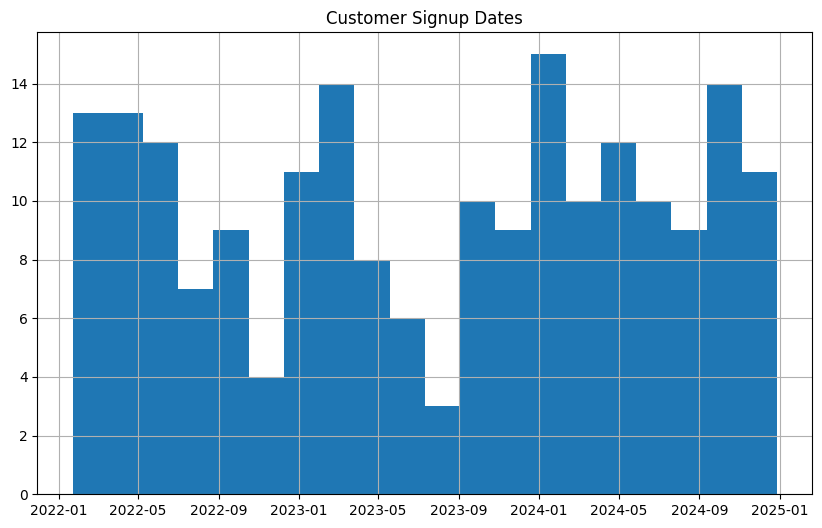

In [4]:
# Customers per Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customers per Region')
plt.show()

# Customer Signup Dates
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
plt.figure(figsize=(10, 6))
customers['SignupDate'].hist(bins=20)
plt.title('Customer Signup Dates')
plt.show()

## Product Analysis

In this section, we will analyze the distribution of products across different categories and the price range of the products.

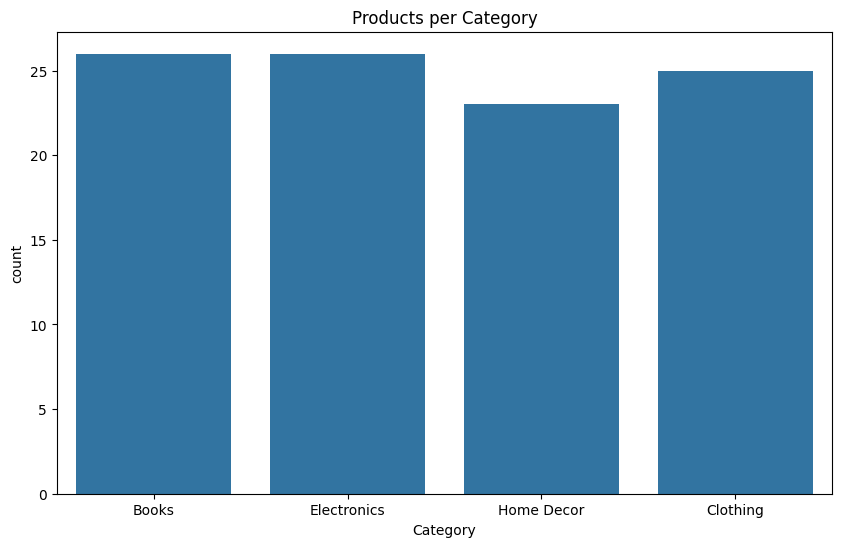

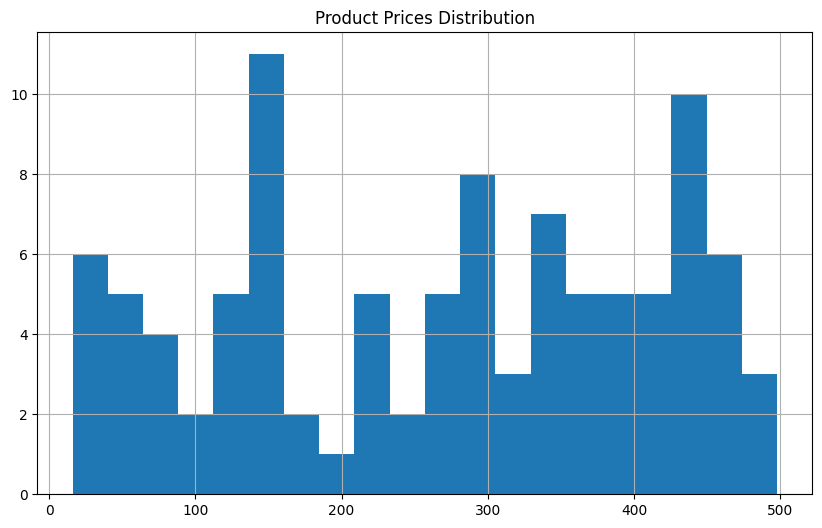

In [5]:
# Products per Category
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Products per Category')
plt.show()

# Product Prices Distribution
plt.figure(figsize=(10, 6))
products['Price'].hist(bins=20)
plt.title('Product Prices Distribution')
plt.show()

## Transaction Patterns

In this section, we will analyze the transaction trends over time, including the number of transactions per day and the total transaction value over time.

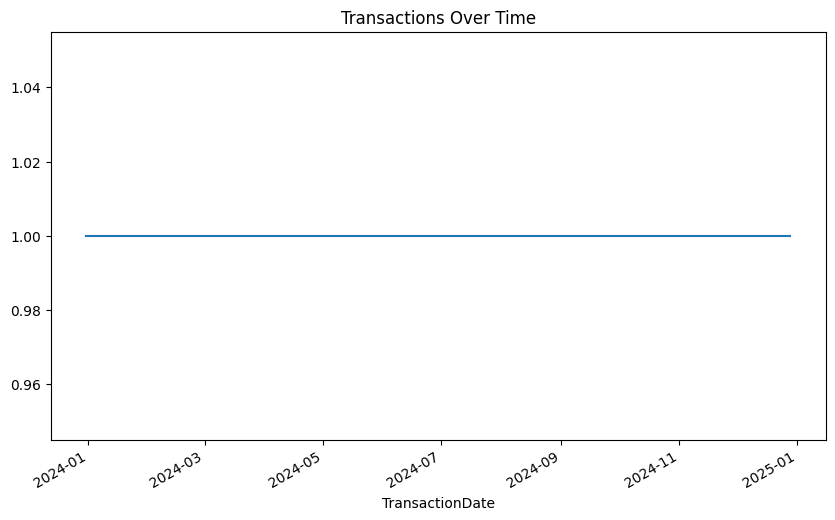

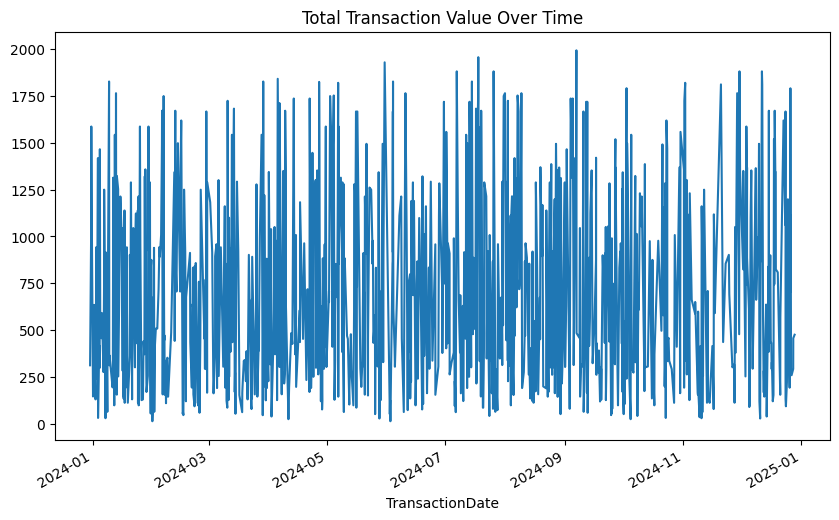

In [6]:
# Transactions Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
plt.figure(figsize=(10, 6))
transactions['TransactionDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transactions Over Time')
plt.show()

# Total Transaction Value Over Time
plt.figure(figsize=(10, 6))
transactions.groupby('TransactionDate')['TotalValue'].sum().plot(kind='line')
plt.title('Total Transaction Value Over Time')
plt.show()

## Summary Statistics

In this section, we will calculate and display summary statistics for key variables, identify and handle missing values, and provide insights using correlation analysis.

In [15]:
# Summary Statistics
try:
    print("Summary Statistics for Customers:")
    print(customers.describe())
    print("\nSummary Statistics for Products:")
    print(products.describe())
    print("\nSummary Statistics for Transactions:")
    print(transactions.describe())
except Exception as e:
    print(f"Error in Summary Statistics: {e}")

# Missing Values
try:
    print("\nMissing Values in Customers:")
    print(customers.isnull().sum())
    print("\nMissing Values in Products:")
    print(products.isnull().sum())
    print("\nMissing Values in Transactions:")
    print(transactions.isnull().sum())
except Exception as e:
    print(f"Error in Missing Values: {e}")

# Handling Missing Values (if any)
try:
    customers.fillna(method='ffill', inplace=True)
    products.fillna(method='ffill', inplace=True)
    transactions.fillna(method='ffill', inplace=True)
    print("Missing values handled successfully.")
except Exception as e:
    print(f"Error in Handling Missing Values: {e}")

Summary Statistics for Customers:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Summary Statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Summary Statistics for Transactions:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   4

<ipython-input-15-826d042af4e1>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers.fillna(method='ffill', inplace=True)
<ipython-input-15-826d042af4e1>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products.fillna(method='ffill', inplace=True)
<ipython-input-15-826d042af4e1>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  transactions.fillna(method='ffill', inplace=True)


## Correlation Analysis

In this section, we will perform correlation analysis to identify relationships between numerical variables. We will use a heatmap to visualize the correlation matrix.

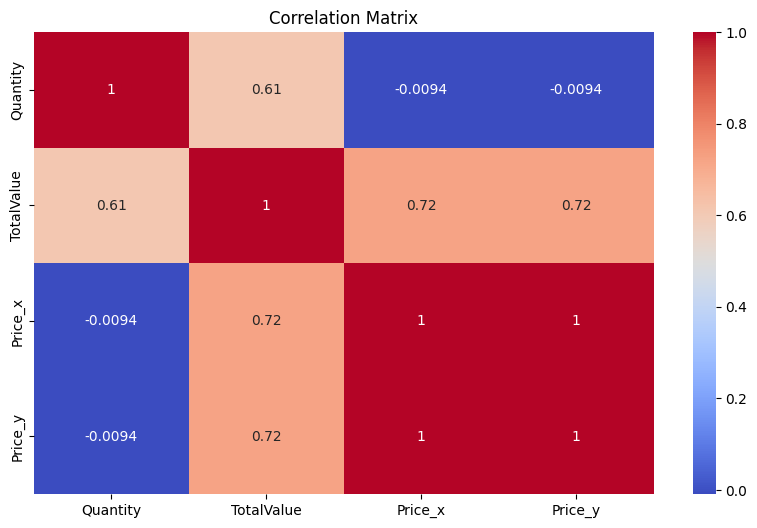

In [19]:
# Select only numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Correlation Analysis
try:
    plt.figure(figsize=(10, 6))
    sns.heatmap(merged_df[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
except Exception as e:
    print(f"Error in Correlation Analysis: {e}")

## Advanced Visualizations

In this section, we will create more sophisticated plots such as pair plots, heatmaps, and bar plots with annotations to enhance the visual presentation of the data.

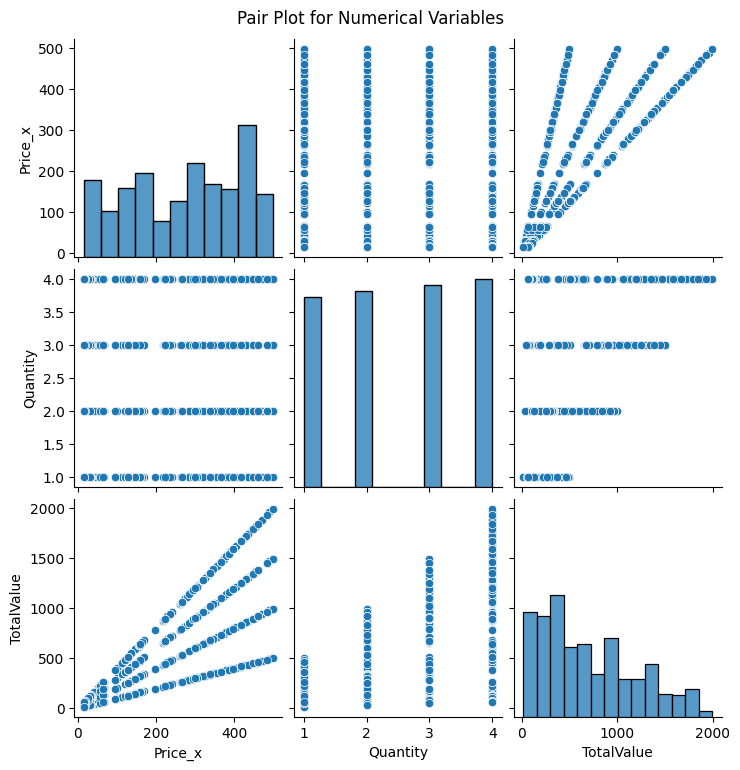

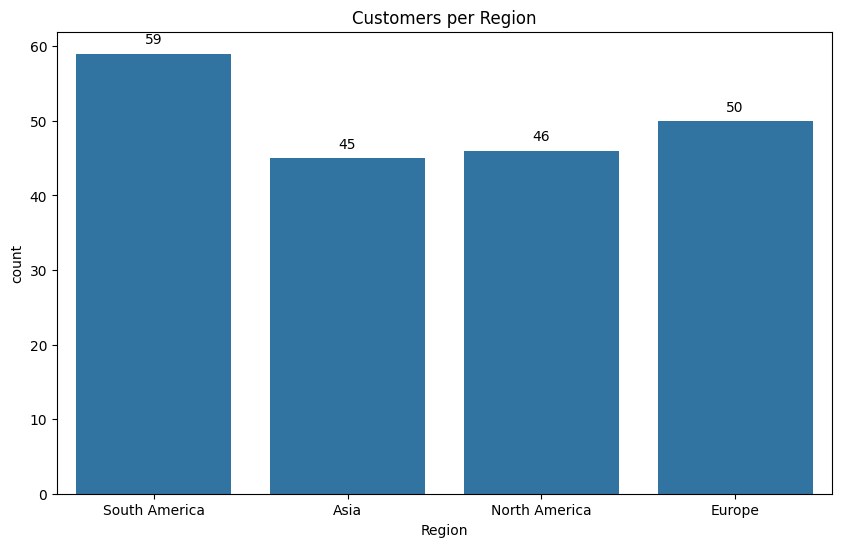

In [20]:
# Pair Plot for Numerical Variables
# Adjust the column names based on the actual columns in merged_df
sns.pairplot(merged_df[['Price_x', 'Quantity', 'TotalValue']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

# Bar Plot with Annotations for Customers per Region
plt.figure(figsize=(10, 6))
region_plot = sns.countplot(data=customers, x='Region')
plt.title('Customers per Region')
for p in region_plot.patches:
    region_plot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10), textcoords = 'offset points')
plt.show()